In [1]:
# Import standard packages
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, OneHotEncoder
%matplotlib inline

In [2]:
# Import the data
df = pd.read_csv("./data/ln_price_dataframe")


# Investigating the data

In [3]:
#checking import of data
df                  

,id,date,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,12.309982,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,13.195614,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,12.100712,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,13.311329,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,13.142166,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,12.793859,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,12.899220,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,12.904459,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,12.899220,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   ln_price       21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#categorical data being handled in separate notebook - keeping only numeric data
df1 = df.drop(df[['date', 'view', 'waterfront','condition','grade','zipcode','lat', 'long' ]], axis = 1)
df1.head()



,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,1340,5650
1,6414100192,13.195614,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,1690,7639
2,5631500400,12.100712,2,1.00,770,10000,1.0,770,0.0,1933,NaN,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,1800,7503


In [6]:
df1.shape

(21597, 13)

In [7]:
#checking data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   ln_price       21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   sqft_above     21597 non-null  int64  
 8   sqft_basement  21597 non-null  object 
 9   yr_built       21597 non-null  int64  
 10  yr_renovated   17755 non-null  float64
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 2.1+ MB


Converting non-numeric data types into numeric data types for later regression

In [8]:
df1['sqft_basement'] = df1['sqft_basement'].replace('?', '0.0')
df1['sqft_basement'] = pd.to_numeric(df1['sqft_basement'], errors='coerce')
df1['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [9]:
df1['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [10]:
#check data types 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   ln_price       21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   sqft_above     21597 non-null  int64  
 8   sqft_basement  21597 non-null  float64
 9   yr_built       21597 non-null  int64  
 10  yr_renovated   17755 non-null  float64
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


# Checking Distributions

C:\Users\ninja\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ninja\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ninja\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

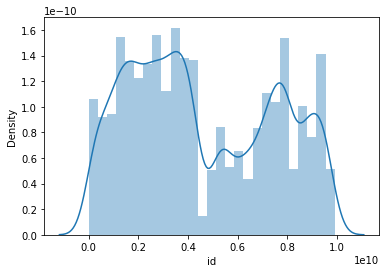

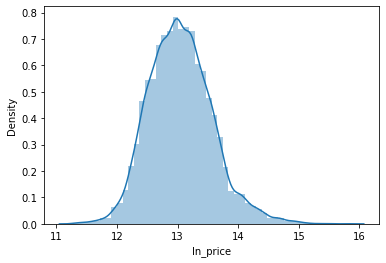

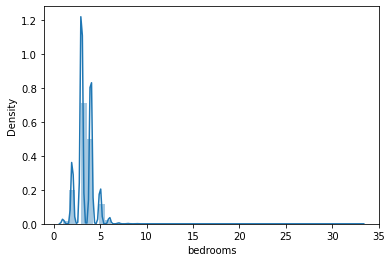

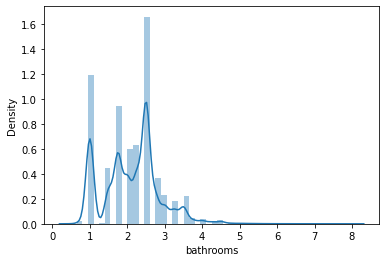

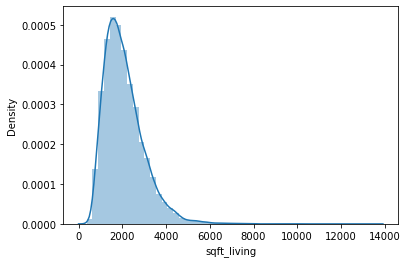

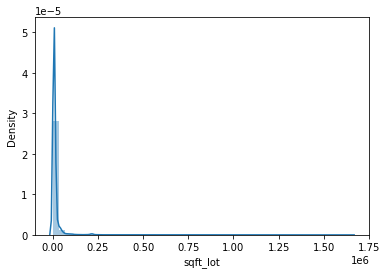

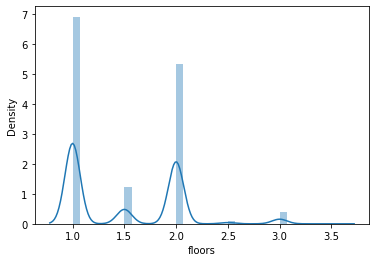

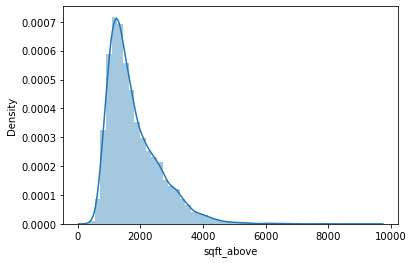

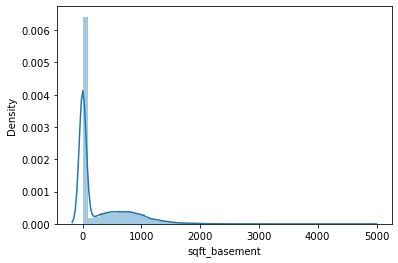

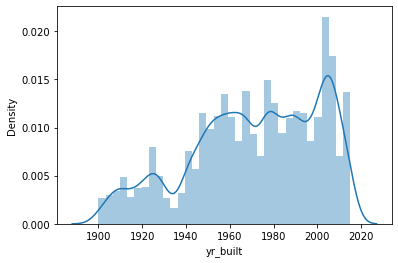

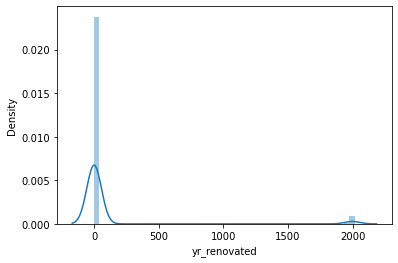

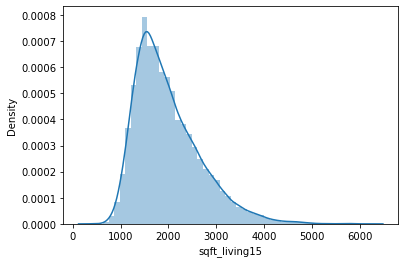

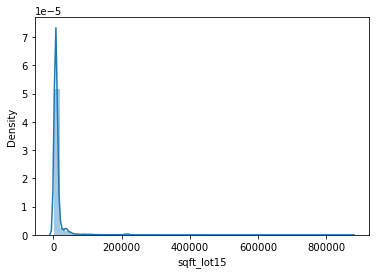

In [11]:
#visualize distributions
for a, column in enumerate(df1.columns):
    plt.figure(a)
    sns.distplot(df1[column])

Note the following: 
- severe outliers apparent in sqft_lot15, sqft_basement, sqft_lot
- right tail skew in sqft_living15, sqft_above, sqft_above
- bimodal distribution in yr_renovated with lots of null values
- left tail skew in yr_built, possible multimodality due to spikes in housing construction

*skewed distributions may require transformation to satisfy linear relationship assumption of linear regression. 

*floors, bedrooms, and bathrooms may be usable in their current state with minimal cleaning needed

### convert yr_renovated into boolean data type indicating a house has been renovated or not

In [12]:
for i,r in enumerate(df1["yr_renovated"]):
    if r == 0:
        df1["yr_renovated"][i] = False
    else:
        df1["yr_renovated"][i] = True

<ipython-input-12-08089abd4cd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["yr_renovated"][i] = False
C:\Users\ninja\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-12-08089abd4cd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["yr_renovated"][i] = True


In [13]:
df1

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,1180,0.0,1955,False,1340,5650
1,6414100192,13.195614,3,2.25,2570,7242,2.0,2170,400.0,1951,True,1690,7639
2,5631500400,12.100712,2,1.00,770,10000,1.0,770,0.0,1933,True,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,1050,910.0,1965,False,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,1680,0.0,1987,False,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.793859,3,2.50,1530,1131,3.0,1530,0.0,2009,False,1530,1509
21593,6600060120,12.899220,4,2.50,2310,5813,2.0,2310,0.0,2014,False,1830,7200
21594,1523300141,12.904459,2,0.75,1020,1350,2.0,1020,0.0,2009,False,1020,2007
21595,291310100,12.899220,3,2.50,1600,2388,2.0,1600,0.0,2004,False,1410,1287


In [15]:
#rename yr_renovated
df1.rename(columns={"yr_renovated": "renovated"}, inplace=True)
df1.head()

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,renovated,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,1180,0.0,1955,False,1340,5650
1,6414100192,13.195614,3,2.25,2570,7242,2.0,2170,400.0,1951,True,1690,7639
2,5631500400,12.100712,2,1.00,770,10000,1.0,770,0.0,1933,True,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,1050,910.0,1965,False,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,1680,0.0,1987,False,1800,7503


In [18]:
#one hot encode renovation data
ohe_df = pd.DataFrame(df1["renovated"])
ohe = OneHotEncoder(drop='first') # drops average, first and most frequent
ohe.fit(ohe_df)
renovation_df = pd.DataFrame(ohe.transform(ohe_df).todense(), columns=ohe.get_feature_names())


In [20]:
renovation_df

,x0_True
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
21592,0.0
21593,0.0
21594,0.0
21595,0.0


In [21]:
#linreg on ohe, assumption check 
sm.OLS(df["ln_price"], sm.add_constant(renovation_df)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     42.62
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           6.78e-11
Time:                        13:49:57   Log-Likelihood:                -16771.
No. Observations:               21597   AIC:                         3.355e+04
Df Residuals:                   21595   BIC:                         3.356e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0361      0.004   3232.112      0.000      13.028      13.044
x0_True        0.0571      0.009      6.529      0.000       0.040       0.074
==============================================================================
Omnibus:                      835.885   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1066.231
Skew:                           0.424   Prob(JB):                    2.96e-232
Kurtosis:                       3.683   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
df1["renovated"] = renovation_df["x0_True"]
df1

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,renovated,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,1340,5650
1,6414100192,13.195614,3,2.25,2570,7242,2.0,2170,400.0,1951,1.0,1690,7639
2,5631500400,12.100712,2,1.00,770,10000,1.0,770,0.0,1933,1.0,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.793859,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,1530,1509
21593,6600060120,12.899220,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,1830,7200
21594,1523300141,12.904459,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,1020,2007
21595,291310100,12.899220,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,1410,1287


### Convert Year of Construction to Age

In [26]:
df1["yr_built"].isna().sum()

0

In [25]:
df1["yr_built"] = 2015 - df1["yr_built"]
df1

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,renovated,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,1180,0.0,60,0.0,1340,5650
1,6414100192,13.195614,3,2.25,2570,7242,2.0,2170,400.0,64,1.0,1690,7639
2,5631500400,12.100712,2,1.00,770,10000,1.0,770,0.0,82,1.0,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,1050,910.0,50,0.0,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,1680,0.0,28,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.793859,3,2.50,1530,1131,3.0,1530,0.0,6,0.0,1530,1509
21593,6600060120,12.899220,4,2.50,2310,5813,2.0,2310,0.0,1,0.0,1830,7200
21594,1523300141,12.904459,2,0.75,1020,1350,2.0,1020,0.0,6,0.0,1020,2007
21595,291310100,12.899220,3,2.50,1600,2388,2.0,1600,0.0,11,0.0,1410,1287


In [27]:
df1.rename(columns={"yr_built":"age"}, inplace=True)
df1.columns

Index(['id', 'ln_price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'age', 'renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Taking a closer look at sqft_lot15, sqft_basement, sqft_lot

In [16]:
#general look at central tendency of the 3 features with severe outliers
df1["sqft_lot15"].describe(), df1["sqft_basement"].describe(), df1["sqft_lot"].describe()

(count     21597.000000
 mean      12758.283512
 std       27274.441950
 min         651.000000
 25%        5100.000000
 50%        7620.000000
 75%       10083.000000
 max      871200.000000
 Name: sqft_lot15, dtype: float64,
 count    21597.000000
 mean       285.716581
 std        439.819830
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%        550.000000
 max       4820.000000
 Name: sqft_basement, dtype: float64,
 count    2.159700e+04
 mean     1.509941e+04
 std      4.141264e+04
 min      5.200000e+02
 25%      5.040000e+03
 50%      7.618000e+03
 75%      1.068500e+04
 max      1.651359e+06
 Name: sqft_lot, dtype: float64)

severe outliers present in sqft_lot15 - note the order of magnitude difference between 75th percentile and max

large presence of nulls in sqft_basement

sqft_lot similar to sqft_lot15 but with greater severity - max is two orders larger than 75th percentile

# Test for Linearity Assumption

In [23]:
df1

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,renovated,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,1180,0.0,1955,False,1340,5650
1,6414100192,13.195614,3,2.25,2570,7242,2.0,2170,400.0,1951,True,1690,7639
2,5631500400,12.100712,2,1.00,770,10000,1.0,770,0.0,1933,True,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,1050,910.0,1965,False,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,1680,0.0,1987,False,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.793859,3,2.50,1530,1131,3.0,1530,0.0,2009,False,1530,1509
21593,6600060120,12.899220,4,2.50,2310,5813,2.0,2310,0.0,2014,False,1830,7200
21594,1523300141,12.904459,2,0.75,1020,1350,2.0,1020,0.0,2009,False,1020,2007
21595,291310100,12.899220,3,2.50,1600,2388,2.0,1600,0.0,2004,False,1410,1287


In [28]:
#drop basement sqft since majority of houses in king county do not have basements

df1 = df1.drop(labels="sqft_basement", axis=1)
df1

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,age,renovated,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,1180,60,0.0,1340,5650
1,6414100192,13.195614,3,2.25,2570,7242,2.0,2170,64,1.0,1690,7639
2,5631500400,12.100712,2,1.00,770,10000,1.0,770,82,1.0,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,1050,50,0.0,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,1680,28,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.793859,3,2.50,1530,1131,3.0,1530,6,0.0,1530,1509
21593,6600060120,12.899220,4,2.50,2310,5813,2.0,2310,1,0.0,1830,7200
21594,1523300141,12.904459,2,0.75,1020,1350,2.0,1020,6,0.0,1020,2007
21595,291310100,12.899220,3,2.50,1600,2388,2.0,1600,11,0.0,1410,1287


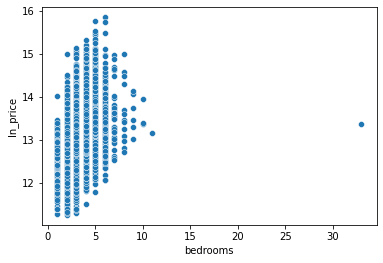

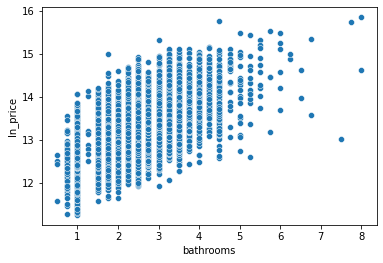

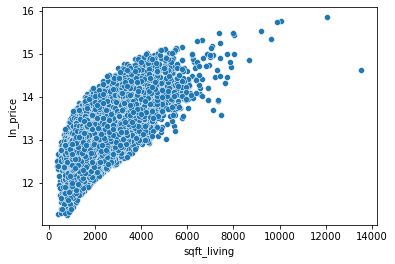

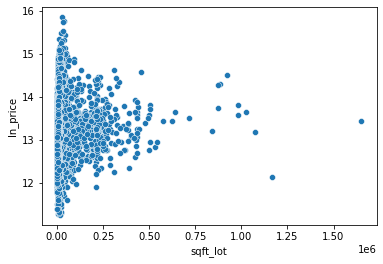

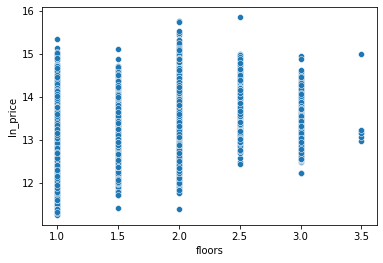

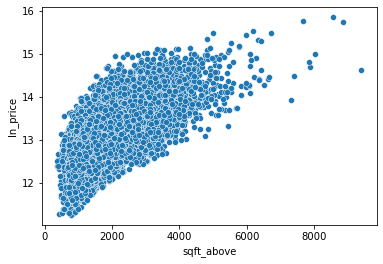

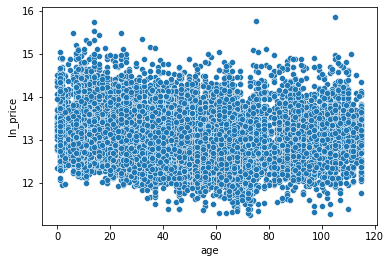

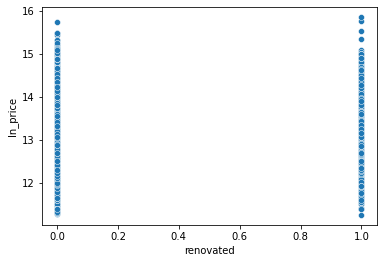

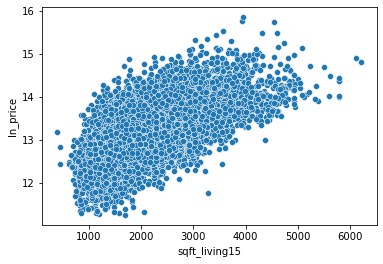

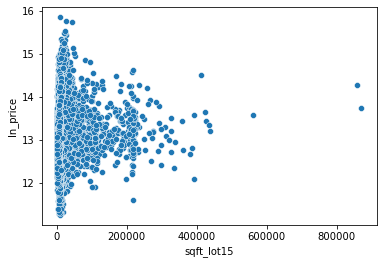

In [29]:
#visualize scatter plot of each variable against the target outcome to check for linearity
target = df1["ln_price"]
inputs = df1.drop(labels=["id","ln_price"], axis=1)
for a, column in enumerate(inputs.columns):
    plt.figure(a)
    sns.scatterplot(y=target, x=inputs[column])

sqft_above, sqft_living, possibly sqft_living15, are non-linear - need transform? or non-logarithmic target

sqft_lot15 needs nulls addressed?

In [32]:
#no nulls found
df1["sqft_lot15"].describe()

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

<AxesSubplot:xlabel='sqft_above', ylabel='ln_price'>

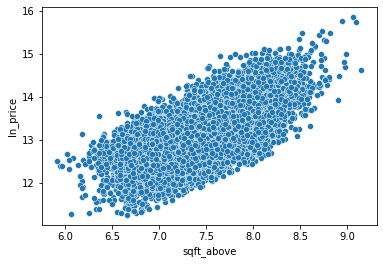

In [33]:
#natural log transform sqft_above - attempt to address non-linearity
inputs["sqft_above"] = np.log(inputs["sqft_above"])
sns.scatterplot(y=target, x=inputs["sqft_above"])

<AxesSubplot:xlabel='sqft_living', ylabel='ln_price'>

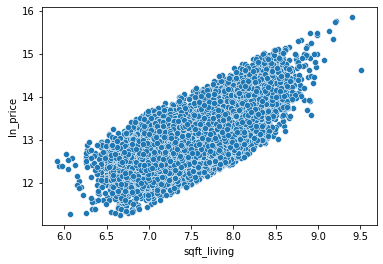

In [34]:
#natural log transform sqft_living - attempt to address non-linearity
inputs["sqft_living"] = np.log(inputs["sqft_living"])
sns.scatterplot(y=target, x=inputs["sqft_living"])

<AxesSubplot:xlabel='sqft_living15', ylabel='ln_price'>

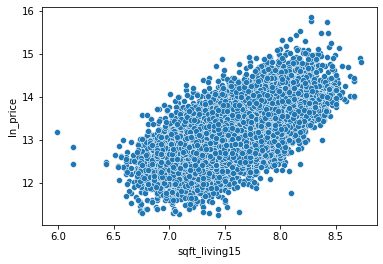

In [35]:
#natural log transform sqft_living15 - attempt to address non-linearity
inputs["sqft_living15"] = np.log(inputs["sqft_living15"])
sns.scatterplot(y=target, x=inputs["sqft_living15"])

In [38]:
#rename all affected columns to reflect the changes above
inputs.rename(columns={"sqft_above":"ln_sqft_above", 
                       "sqft_living":"ln_sqft_living",
                       "sqft_living15":"ln_sqft_living15"},
             inplace=True)
inputs

,bedrooms,bathrooms,ln_sqft_living,sqft_lot,floors,ln_sqft_above,age,renovated,ln_sqft_living15,sqft_lot15
0,3,1.00,7.073270,5650,1.0,7.073270,60,0.0,7.200425,5650
1,3,2.25,7.851661,7242,2.0,7.682482,64,1.0,7.432484,7639
2,2,1.00,6.646391,10000,1.0,6.646391,82,1.0,7.908387,8062
3,4,3.00,7.580700,5000,1.0,6.956545,50,0.0,7.215240,5000
4,3,2.00,7.426549,8080,1.0,7.426549,28,0.0,7.495542,7503
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,7.333023,1131,3.0,7.333023,6,0.0,7.333023,1509
21593,4,2.50,7.745003,5813,2.0,7.745003,1,0.0,7.512071,7200
21594,2,0.75,6.927558,1350,2.0,6.927558,6,0.0,6.927558,2007
21595,3,2.50,7.377759,2388,2.0,7.377759,11,0.0,7.251345,1287


In [ ]:
#save initial model inputs and natural log target prices for use in final constructor notebook via csv
inputs.to_csv("./data/initial_numeric_inputs")
target.to_csv("./data/house_price_target_natlog")